In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the API key.
from config import weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a294f8e259de58017d6489f0b4d2b844


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | bagado
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | powell
Processing Record 14 of Set 1 | vadso
Processing Record 15 of Set 1 | omboue
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | oussouye
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | tromso
Processing Record 21 of Set 1 | holme
Processing Record 22 of Set 1 | ixtapa
Processing Record 23 of Set 1 

Processing Record 36 of Set 4 | lebu
Processing Record 37 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 4 | nashua
Processing Record 39 of Set 4 | domingos martins
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | rio gallegos
Processing Record 42 of Set 4 | bara
Processing Record 43 of Set 4 | fayaoue
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | valparaiso
Processing Record 46 of Set 4 | virginia beach
Processing Record 47 of Set 4 | pyaozerskiy
Processing Record 48 of Set 4 | portree
Processing Record 49 of Set 4 | kaspiyskiy
Processing Record 50 of Set 4 | upernavik
Processing Record 1 of Set 5 | marienburg
Processing Record 2 of Set 5 | atasu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | tadpatri
Processing Record 5 of Set 5 | micheweni
Processing Record 6 of Set 5 | waingapu
Processing Record 7 of Set 5 | raquira
Processing Record 8

Processing Record 24 of Set 8 | visby
Processing Record 25 of Set 8 | vao
Processing Record 26 of Set 8 | aketi
Processing Record 27 of Set 8 | havre-saint-pierre
Processing Record 28 of Set 8 | port macquarie
Processing Record 29 of Set 8 | saldanha
Processing Record 30 of Set 8 | burns lake
Processing Record 31 of Set 8 | kamenka
Processing Record 32 of Set 8 | lar
Processing Record 33 of Set 8 | solnechnyy
Processing Record 34 of Set 8 | hudson bay
Processing Record 35 of Set 8 | rosario
Processing Record 36 of Set 8 | cherskiy
Processing Record 37 of Set 8 | belmonte
Processing Record 38 of Set 8 | cap malheureux
Processing Record 39 of Set 8 | riohacha
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | cururupu
Processing Record 43 of Set 8 | wuzhou
Processing Record 44 of Set 8 | vanimo
Processing Record 45 of Set 8 | strelka
Processing Record 46 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 47 of Set 8 |

Processing Record 18 of Set 12 | denpasar
Processing Record 19 of Set 12 | ketchikan
Processing Record 20 of Set 12 | muhos
Processing Record 21 of Set 12 | tshane
Processing Record 22 of Set 12 | vinukonda
Processing Record 23 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 24 of Set 12 | sanary-sur-mer
Processing Record 25 of Set 12 | cocobeach
Processing Record 26 of Set 12 | tupik
Processing Record 27 of Set 12 | miraflores
Processing Record 28 of Set 12 | togur
Processing Record 29 of Set 12 | bulawayo
Processing Record 30 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 31 of Set 12 | agua branca
Processing Record 32 of Set 12 | matagami
Processing Record 33 of Set 12 | oudtshoorn
Processing Record 34 of Set 12 | yerofey pavlovich
Processing Record 35 of Set 12 | beloha
Processing Record 36 of Set 12 | cairns
Processing Record 37 of Set 12 | cayenne
Processing Record 38 of Set 12 | vernon
Processing Record 39 of Set 12 | kaohsiung
Process

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,69.10,77,90,6.91,ZA,2021-12-04 08:47:33
1,Tiksi,71.6872,128.8694,-29.94,99,76,3.27,RU,2021-12-04 08:51:45
2,East London,-33.0153,27.9116,65.34,94,75,9.22,ZA,2021-12-04 08:51:45
3,Tasiilaq,65.6145,-37.6368,15.53,56,100,6.58,GL,2021-12-04 08:51:46
4,Vaini,-21.2000,-175.2000,78.96,94,75,10.36,TO,2021-12-04 08:51:46
5,Bagado,5.4116,-76.4152,72.79,99,99,0.51,CO,2021-12-04 08:51:47
6,Sao Filipe,14.8961,-24.4956,74.28,73,100,8.28,CV,2021-12-04 08:51:47
7,Yellowknife,62.4560,-114.3525,-16.58,86,75,8.05,CA,2021-12-04 08:51:47
8,Cape Town,-33.9258,18.4232,73.09,54,0,5.01,ZA,2021-12-04 08:48:47
9,Atuona,-9.8000,-139.0333,78.67,73,9,20.45,PF,2021-12-04 08:51:47


In [15]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2021-12-04 08:47:33,-33.9180,25.5701,69.10,77,90,6.91
1,Tiksi,RU,2021-12-04 08:51:45,71.6872,128.8694,-29.94,99,76,3.27
2,East London,ZA,2021-12-04 08:51:45,-33.0153,27.9116,65.34,94,75,9.22
3,Tasiilaq,GL,2021-12-04 08:51:46,65.6145,-37.6368,15.53,56,100,6.58
4,Vaini,TO,2021-12-04 08:51:46,-21.2000,-175.2000,78.96,94,75,10.36
5,Bagado,CO,2021-12-04 08:51:47,5.4116,-76.4152,72.79,99,99,0.51
6,Sao Filipe,CV,2021-12-04 08:51:47,14.8961,-24.4956,74.28,73,100,8.28
7,Yellowknife,CA,2021-12-04 08:51:47,62.4560,-114.3525,-16.58,86,75,8.05
8,Cape Town,ZA,2021-12-04 08:48:47,-33.9258,18.4232,73.09,54,0,5.01
9,Atuona,PF,2021-12-04 08:51:47,-9.8000,-139.0333,78.67,73,9,20.45


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

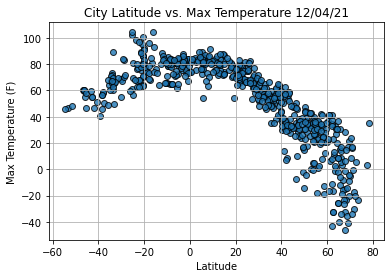

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

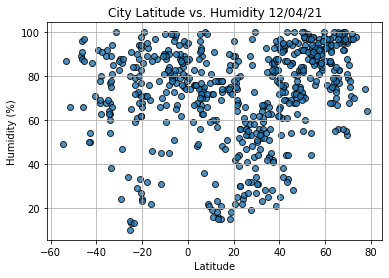

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

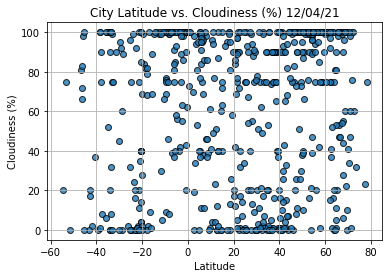

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

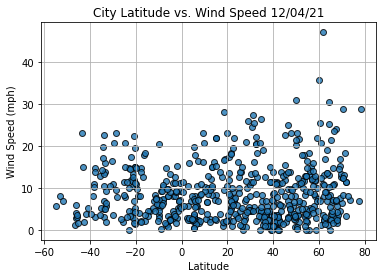

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()